# To demonstrate the group by feature of Pandas data frame

In [1]:
import pandas as pd

In [3]:
# We will use the global superstore data set for demonstration
# Create the global superstore data frame from the excel Global Superstore.xls (Orders tab)

global_superstore_df = pd.read_excel('C:\PythonTutorial\MyPandas_Blog\data sets\Global Superstore.xls','Orders')

global_superstore_df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,City,State,...,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority
0,32298,CA-2012-124891,2012-07-31,2012-07-31,Same Day,RH-19495,Rick Hansen,Consumer,New York City,New York,...,TEC-AC-10003033,Technology,Accessories,Plantronics CS510 - Over-the-Head monaural Wir...,2309.650,7,0.0,762.1845,933.57,Critical
1,26341,IN-2013-77878,2013-02-05,2013-02-07,Second Class,JR-16210,Justin Ritter,Corporate,Wollongong,New South Wales,...,FUR-CH-10003950,Furniture,Chairs,"Novimex Executive Leather Armchair, Black",3709.395,9,0.1,-288.7650,923.63,Critical
2,25330,IN-2013-71249,2013-10-17,2013-10-18,First Class,CR-12730,Craig Reiter,Consumer,Brisbane,Queensland,...,TEC-PH-10004664,Technology,Phones,"Nokia Smart Phone, with Caller ID",5175.171,9,0.1,919.9710,915.49,Medium
3,13524,ES-2013-1579342,2013-01-28,2013-01-30,First Class,KM-16375,Katherine Murray,Home Office,Berlin,Berlin,...,TEC-PH-10004583,Technology,Phones,"Motorola Smart Phone, Cordless",2892.510,5,0.1,-96.5400,910.16,Medium
4,47221,SG-2013-4320,2013-11-05,2013-11-06,Same Day,RH-9495,Rick Hansen,Consumer,Dakar,Dakar,...,TEC-SHA-10000501,Technology,Copiers,"Sharp Wireless Fax, High-Speed",2832.960,8,0.0,311.5200,903.04,Critical


## Use Case : Get the total sale per country

In [16]:
global_superstore_sales_country_df = global_superstore_df[["Country","Sales"]]
global_superstore_sales_country_df.head()

,Country,Sales
0,United States,2309.650
1,Australia,3709.395
2,Australia,5175.171
3,Germany,2892.510
4,Senegal,2832.960


In [25]:
#First we will create a dictionary with country name as the key
dict_sales_per_country = {}

countries = []
sales = []
for country,sales_per_country_df in global_superstore_sales_country_df.groupby('Country'):
    #dict_sales_per_country[city] = sales_per_country_df['Sales'].sum()
    countries.append(country)
    sales.append(sales_per_country_df['Sales'].sum())

dict_sales_per_country = {
    'Countries': countries,
    'Sales': sales
}

#print (dict_sales_per_country)
#Then create a data frame from the dictinary
country_total_sales_df = pd.DataFrame(dict_sales_per_country)
country_total_sales_df

,Countries,Sales
0,Afghanistan,21673.32000
1,Albania,3888.12000
2,Algeria,36091.59000
3,Angola,25554.00000
4,Argentina,57511.78328
...,...,...
142,Venezuela,26587.82956
143,Vietnam,65800.19940
144,Yemen,2465.71200
145,Zambia,26035.50000


# Sales by countries SQL 

*SELECT country,SUM(sales) AS sum_sales
FROM global_superstore
GROUP BY country
ORDER BY country ASC;*

![SELECT country,SUM(sales) AS sum_sales
FROM global_superstore
GROUP BY country
ORDER BY country ASC](images/sales_by_country.jpg "SELECT country,SUM(sales) AS sum_sales
FROM global_superstore
GROUP BY country
ORDER BY country ASC;")

## Group By cities

In [28]:
global_superstore_sales_cities_df = global_superstore_df[["Country","City","Sales"]]
global_superstore_sales_cities_df.head()

,Country,City,Sales
0,United States,New York City,2309.650
1,Australia,Wollongong,3709.395
2,Australia,Brisbane,5175.171
3,Germany,Berlin,2892.510
4,Senegal,Dakar,2832.960


In [29]:
for city,sales_by_city_df in global_superstore_sales_cities_df.groupby("City"):
    print(sales_by_city_df)

       Country    City     Sales
1053   Germany  Aachen  1309.203
3393   Germany  Aachen  1050.732
13594  Germany  Aachen   170.460
15125  Germany  Aachen   128.340
20562  Germany  Aachen    87.030
24672  Germany  Aachen   101.760
26731  Germany  Aachen    59.160
28042  Germany  Aachen    63.450
28243  Germany  Aachen    53.550
30414  Germany  Aachen    26.040
31790  Germany  Aachen   521.856
35237  Germany  Aachen    50.040
36405  Germany  Aachen    58.590
42746  Germany  Aachen    41.040
43544  Germany  Aachen    60.540
46395  Germany  Aachen     9.540
49479  Germany  Aachen    11.820
      Country   City    Sales
3857  Germany  Aalen  979.695
       Country   City   Sales
18096  Belgium  Aalst  138.69
29079  Belgium  Aalst   68.04
30164  Belgium  Aalst  116.52
33650  Belgium  Aalst   64.08
       Country City    Sales
10756  Nigeria  Aba  196.272
18118  Nigeria  Aba  191.205
18720  Nigeria  Aba   73.926
21676  Nigeria  Aba  124.416
21944  Nigeria  Aba  134.946
24872  Nigeria  Aba   

50488  United States  Anaheim     3.360
      Country        City     Sales
2441   Brazil  Ananindeua  1970.496
21173  Brazil  Ananindeua    70.560
22759  Brazil  Ananindeua   104.020
23000  Brazil  Ananindeua    73.200
32175  Brazil  Ananindeua    52.560
35193  Brazil  Ananindeua    42.360
      Country       City   Sales
1962    India  Anantapur  596.70
10950   India  Anantapur  139.50
30507   India  Anantapur   38.34
      Country    City   Sales
13167   Italy  Ancona  172.53
16692   Italy  Ancona   86.94
18887   Italy  Ancona  116.52
35756   Italy  Ancona   30.66
          Country     City   Sales
11887  Uzbekistan  Andijon  239.28
27211  Uzbekistan  Andijon   63.90
28819  Uzbekistan  Andijon   31.95
29560  Uzbekistan  Andijon  169.68
38920  Uzbekistan  Andijon   28.56
43477  Uzbekistan  Andijon   15.57
47124  Uzbekistan  Andijon    5.70
48771  Uzbekistan  Andijon   13.11
             Country     City   Sales
27715  United States  Andover   51.80
34372  United States  Andover  354.

51110  United States  Auburn    1.240
      Country  City    Sales
13491  France  Auch  135.558
18031  France  Auch  120.960
29196  France  Auch   59.220
           Country      City     Sales
424    New Zealand  Auckland  1136.664
1266   New Zealand  Auckland   556.704
1343   New Zealand  Auckland   563.904
1858   New Zealand  Auckland  1046.376
2222   New Zealand  Auckland   867.960
...            ...       ...       ...
45926  New Zealand  Auckland     7.200
48166  New Zealand  Auckland     7.416
48411  New Zealand  Auckland     7.092
48892  New Zealand  Auckland     8.154
49797  New Zealand  Auckland     2.880

[107 rows x 3 columns]
       Country      City      Sales
104    Germany  Augsburg  1469.2500
1288   Germany  Augsburg  1252.5840
2328   Germany  Augsburg  1854.4950
4308   Germany  Augsburg  1545.0825
8240   Germany  Augsburg   623.3175
8704   Germany  Augsburg   333.3600
10954  Germany  Augsburg   354.8610
18775  Germany  Augsburg   131.8500
19300  Germany  Augsburg   111

51005  Nigeria  Bauchi    2.664
      Country    City       Sales
1047     Cuba  Bayamo   722.36000
1169     Cuba  Bayamo  1993.08000
2512     Cuba  Bayamo  1512.20952
4192     Cuba  Bayamo   447.20000
4276     Cuba  Bayamo   636.52440
6352     Cuba  Bayamo   405.12000
7983     Cuba  Bayamo   346.08000
8508     Cuba  Bayamo   586.40000
8695     Cuba  Bayamo   680.76000
14328    Cuba  Bayamo   358.16000
15321    Cuba  Bayamo   224.98000
15706    Cuba  Bayamo   333.66000
18296    Cuba  Bayamo   221.76000
19200    Cuba  Bayamo   333.84000
20542    Cuba  Bayamo   109.38000
20559    Cuba  Bayamo   224.40000
21822    Cuba  Bayamo   125.36000
21932    Cuba  Bayamo   159.60000
22850    Cuba  Bayamo    30.40000
23216    Cuba  Bayamo    54.18000
27552    Cuba  Bayamo    80.00000
30148    Cuba  Bayamo    36.08000
30404    Cuba  Bayamo    32.32000
33269    Cuba  Bayamo    52.20000
37157    Cuba  Bayamo    27.96000
38663    Cuba  Bayamo    36.76000
40954    Cuba  Bayamo    39.48000
41824    Cuba  B

50162  Turkey  Bornova     5.052
      Country      City   Sales
2370     Iran  Borujerd  877.92
3371     Iran  Borujerd  764.28
12571    Iran  Borujerd  102.90
17058    Iran  Borujerd  118.80
18418    Iran  Borujerd   81.27
18660    Iran  Borujerd  158.58
28752    Iran  Borujerd   83.88
28902    Iran  Borujerd   44.28
30063    Iran  Borujerd   18.96
37336    Iran  Borujerd   49.47
49879    Iran  Borujerd    3.99
      Country        City   Sales
7722    Italy  Boscoreale  232.62
24798   Italy  Boscoreale  174.33
             Country          City   Sales
1750   United States  Bossier City  572.58
1836   United States  Bossier City  646.74
19837  United States  Bossier City   50.94
21338  United States  Bossier City  129.92
37449  United States  Bossier City   11.36
47283  United States  Bossier City    5.64
       Country      City   Sales
7184   Romania  Botosani  513.60
8697   Romania  Botosani  570.15
8778   Romania  Botosani  512.34
15738  Romania  Botosani  435.99
23615  Romania 

49676  Philippines  Caloocan    5.3295
         Country       City     Sales
1150   Australia  Caloundra  1754.298
1267   Australia  Caloundra  2300.076
1603   Australia  Caloundra  1201.095
2501   Australia  Caloundra   359.235
2753   Australia  Caloundra   714.420
...          ...        ...       ...
46536  Australia  Caloundra    18.414
47681  Australia  Caloundra    85.212
48509  Australia  Caloundra    11.448
49234  Australia  Caloundra    33.120
49955  Australia  Caloundra     9.153

[71 rows x 3 columns]
      Country              City    Sales
16027  France  Caluire-et-Cuire  198.504
      Country      City       Sales
278      Cuba  Camagüey  1053.68840
581      Cuba  Camagüey  1916.88000
978      Cuba  Camagüey  2419.20000
1785     Cuba  Camagüey  2129.70000
2253     Cuba  Camagüey   398.88000
2413     Cuba  Camagüey  1078.08000
4788     Cuba  Camagüey   663.00000
5750     Cuba  Camagüey   513.52000
6752     Cuba  Camagüey   119.64000
7665     Cuba  Camagüey   739.80000
8986

51264  France  Chartres   17.8800
              Country     City  Sales
20029  United Kingdom  Chatham  78.75
      Country    City    Sales
7262   France  Chatou  618.300
13353  France  Chatou  439.416
             Country         City    Sales
12165  United States  Chattanooga  390.368
15298  United States  Chattanooga  132.224
21567  United States  Chattanooga   91.475
23895  United States  Chattanooga   95.976
27478  United States  Chattanooga  101.520
30356  United States  Chattanooga  143.928
41488  United States  Chattanooga   16.720
49453  United States  Chattanooga    8.100
49549  United States  Chattanooga    4.928
50498  United States  Chattanooga    3.564
      Country      City    Sales
20500  France  Chaumont  123.900
20844  France  Chaumont  119.610
27847  France  Chaumont  117.234
36848  France  Chaumont   29.550
44838  France  Chaumont   24.720
45916  France  Chaumont   13.200
      Country      City    Sales
4095   France  Chaville  301.410
11480  France  Chaville  24

51065  United States  Colorado Springs     1.938
             Country      City     Sales
563    United States  Columbia  1927.590
778    United States  Columbia  1633.140
902    United States  Columbia   901.950
1061   United States  Columbia   544.380
1277   United States  Columbia   826.620
...              ...       ...       ...
49084  United States  Columbia     6.460
49437  United States  Columbia     9.664
49861  United States  Columbia    14.136
50205  United States  Columbia     9.640
50495  United States  Columbia     5.400

[81 rows x 3 columns]
             Country      City     Sales
221    United States  Columbus  1439.976
343    United States  Columbus  2939.930
1561   United States  Columbus  1889.946
1833   United States  Columbus  1454.490
1991   United States  Columbus  1049.970
...              ...       ...       ...
50913  United States  Columbus     3.760
50925  United States  Columbus     2.862
51108  United States  Columbus     3.132
51118  United States  Colu

33119  France  Dax  46.44
      Country          City    Sales
3032    Syria  Dayr az Zawr  378.450
8840    Syria  Dayr az Zawr  386.388
12459   Syria  Dayr az Zawr  170.190
15320   Syria  Dayr az Zawr  119.052
18933   Syria  Dayr az Zawr   48.930
20458   Syria  Dayr az Zawr  166.920
28989   Syria  Dayr az Zawr   49.440
29654   Syria  Dayr az Zawr   81.756
31571   Syria  Dayr az Zawr   41.700
33699   Syria  Dayr az Zawr  100.980
38732   Syria  Dayr az Zawr   16.800
44096   Syria  Dayr az Zawr   12.690
             Country           City     Sales
13597  United States  Daytona Beach  191.5155
31953  United States  Daytona Beach   50.8800
44131  United States  Daytona Beach   27.3120
51066  United States  Daytona Beach    2.6240
             Country      City   Sales
5268   United States  Dearborn  523.48
6939   United States  Dearborn  555.21
8663   United States  Dearborn  301.96
12971  United States  Dearborn  161.82
34798  United States  Dearborn   60.84
             Country         

41718  United States  Eau Claire   32.56
        Country     City   Sales
6232   Cameroon  Ebolowa  460.20
28945  Cameroon  Ebolowa   52.92
      Country        City    Sales
2573   France  Echirolles  762.075
14500  France  Echirolles  207.120
17764  France  Echirolles   89.550
24701  France  Echirolles  134.700
25122  France  Echirolles   65.340
         Country    City    Sales
16739  Australia  Echuca  336.528
33870  Australia  Echuca   72.000
        Country  City   Sales
19304  Cameroon  Edea  137.40
48655  Cameroon  Edea   11.85
             Country      City   Sales
10112  United States  Edinburg  83.840
48853  United States  Edinburg   2.068
50442  United States  Edinburg   2.368
              Country       City     Sales
23     United Kingdom  Edinburgh  5273.700
1201   United Kingdom  Edinburgh  1429.440
2878   United Kingdom  Edinburgh   820.440
4493   United Kingdom  Edinburgh  1062.360
5081   United Kingdom  Edinburgh   899.160
7942   United Kingdom  Edinburgh   777.960
8

24215  France  Fontainebleau    47.640
      Country                City     Sales
660    France  Fontenay-aux-Roses  943.8660
5141   France  Fontenay-aux-Roses  246.1500
7672   France  Fontenay-aux-Roses  736.8225
12148  France  Fontenay-aux-Roses  546.8850
13240  France  Fontenay-aux-Roses  248.7780
13490  France  Fontenay-aux-Roses   87.9600
13765  France  Fontenay-aux-Roses  161.9100
19599  France  Fontenay-aux-Roses  155.7000
20216  France  Fontenay-aux-Roses   88.0740
21274  France  Fontenay-aux-Roses  138.9600
27963  France  Fontenay-aux-Roses  120.3120
30339  France  Fontenay-aux-Roses  258.9000
36060  France  Fontenay-aux-Roses   43.2000
37018  France  Fontenay-aux-Roses   31.5900
40959  France  Fontenay-aux-Roses   42.2100
      Country               City  Sales
37879  France  Fontenay-le-Comte  13.02
      Country                City    Sales
8382   France  Fontenay-sous-Bois  673.647
41060  France  Fontenay-sous-Bois   31.500
42315  France  Fontenay-sous-Bois   79.440
     

49977  Turkey  Gaziantep    10.680
      Country      City    Sales
10107  Turkey  Gaziemir   98.016
12821  Turkey  Gaziemir  278.304
26905  Turkey  Gaziemir  116.880
34723  Turkey  Gaziemir   16.512
35152  Turkey  Gaziemir   10.560
36247  Turkey  Gaziemir   13.608
37682  Turkey  Gaziemir   18.936
48267  Turkey  Gaziemir   26.976
48381  Turkey  Gaziemir   14.208
50265  Turkey  Gaziemir   11.148
      Country    City   Sales
2536   Poland  Gdansk  858.96
8091   Poland  Gdansk  509.88
10861  Poland  Gdansk  385.86
11699  Poland  Gdansk  410.22
12729  Poland  Gdansk  312.21
22287  Poland  Gdansk  107.46
23129  Poland  Gdansk   71.22
26643  Poland  Gdansk  193.80
27718  Poland  Gdansk   48.48
35363  Poland  Gdansk   30.69
35912  Poland  Gdansk   28.56
37732  Poland  Gdansk   25.05
43885  Poland  Gdansk   20.82
      Country    City   Sales
4188   Poland  Gdynia  414.72
4413   Poland  Gdynia  495.42
11015  Poland  Gdynia  308.16
23399  Poland  Gdynia   54.00
34865  Poland  Gdynia   14.43
  

48157    Cuba  Guantánamo    10.72000
      Country       City  Sales
17047  Brazil  Guarapari  146.6
      Country        City  Sales
42558  Brazil  Guarapuava  21.54
      Country           City   Sales
19649  Brazil  Guaratinguetá  105.84
23882  Brazil  Guaratinguetá   69.30
30329  Brazil  Guaratinguetá  138.60
39260  Brazil  Guaratinguetá   32.04
48215  Brazil  Guaratinguetá    8.88
         Country      City   Sales
37109  Venezuela  Guarenas  34.824
      Country     City   Sales
19479  Brazil  Guarujá  292.34
33449  Brazil  Guarujá   44.34
50283  Brazil  Guarujá   19.88
      Country       City   Sales
5017   Brazil  Guarulhos  567.80
5270   Brazil  Guarulhos  410.76
7691   Brazil  Guarulhos  410.50
14460  Brazil  Guarulhos  216.30
22079  Brazil  Guarulhos  123.12
29288  Brazil  Guarulhos   54.00
31577  Brazil  Guarulhos   41.42
38138  Brazil  Guarulhos   22.64
38411  Brazil  Guarulhos   39.44
41143  Brazil  Guarulhos   58.40
41554  Brazil  Guarulhos   40.38
      Country     Ci

48835   China  Hengyang    13.68
           Country   City   Sales
8498   Afghanistan  Herat  731.82
15560  Afghanistan  Herat  243.54
18633  Afghanistan  Herat  346.32
21463  Afghanistan  Herat  169.68
29507  Afghanistan  Herat  203.88
              Country      City    Sales
8665   United Kingdom  Hereford  246.720
12269  United Kingdom  Hereford  336.060
13309  United Kingdom  Hereford  164.880
18287  United Kingdom  Hereford  203.520
28244  United Kingdom  Hereford   74.280
30857  United Kingdom  Hereford   59.598
       Country     City     Sales
910    Germany  Herford  1908.180
4073   Germany  Herford   732.060
5377   Germany  Herford   748.116
15796  Germany  Herford   799.830
45693  Germany  Herford    13.380
      Country        City     Sales
2104   Mexico  Hermosillo  1026.240
4080   Mexico  Hermosillo   463.840
4624   Mexico  Hermosillo   412.800
5560   Mexico  Hermosillo   234.900
5719   Mexico  Hermosillo   327.120
8797   Mexico  Hermosillo   307.272
11907  Mexico  Hermo

30373   India  Indore    57.84
      Country    City    Sales
20044  Turkey  Inegol  156.960
28141  Turkey  Inegol  103.104
29052  Turkey  Inegol   75.168
32166  Turkey  Inegol   25.824
41631  Turkey  Inegol   10.248
             Country       City    Sales
4933   United States  Inglewood  879.984
10188  United States  Inglewood  230.280
11151  United States  Inglewood  354.900
15729  United States  Inglewood  196.776
16152  United States  Inglewood   60.120
16275  United States  Inglewood  128.900
16499  United States  Inglewood  841.568
19876  United States  Inglewood  198.460
25918  United States  Inglewood   29.790
26133  United States  Inglewood  321.920
27506  United States  Inglewood   54.320
37837  United States  Inglewood  116.280
40192  United States  Inglewood   28.400
41928  United States  Inglewood   22.830
44568  United States  Inglewood    5.980
50481  United States  Inglewood    8.820
       Country        City    Sales
5938   Germany  Ingolstadt  346.680
7279   Germany

34013  Denmark  Kalundborg   49.770
       Country    City  Sales
39255  Ukraine  Kalush  23.52
      Country    City   Sales
1010    India  Kalyan  803.52
3247    India  Kalyan  607.14
3606    India  Kalyan  575.64
6343    India  Kalyan  531.48
7321    India  Kalyan  375.90
8874    India  Kalyan  392.88
11941   India  Kalyan   69.30
12171   India  Kalyan  190.44
17594   India  Kalyan   43.50
19566   India  Kalyan  119.64
22013   India  Kalyan   66.96
26025   India  Kalyan   52.80
27041   India  Kalyan   63.36
38122   India  Kalyan   15.48
46721   India  Kalyan   11.52
      Country       City   Sales
14258   India  Kamarhati  209.34
30786   India  Kamarhati   95.04
30884   India  Kamarhati   86.04
                             Country    City    Sales
35  Democratic Republic of the Congo  Kamina  3817.26
      Country     City    Sales
12339  Uganda  Kampala   75.690
20429  Uganda  Kampala   52.857
23212  Uganda  Kampala  220.536
24741  Uganda  Kampala   76.905
25403  Uganda  Kampala  

43919  Malaysia  Kota Kinabalu    21.96
       Country   City   Sales
10401  Finland  Kotka  173.94
22674  Finland  Kotka   59.85
      Country    City    Sales
482      Chad  Koumra  1288.80
41818    Chad  Koumra    28.23
         Country     City    Sales
4116   Hong Kong  Kowloon  1091.25
5238   Hong Kong  Kowloon  2105.04
9130   Hong Kong  Kowloon   719.70
11008  Hong Kong  Kowloon   372.12
11643  Hong Kong  Kowloon   345.72
16462  Hong Kong  Kowloon   407.04
18509  Hong Kong  Kowloon   148.80
19405  Hong Kong  Kowloon   145.05
24263  Hong Kong  Kowloon    73.80
25499  Hong Kong  Kowloon   100.92
27540  Hong Kong  Kowloon    57.69
28250  Hong Kong  Kowloon    73.05
28869  Hong Kong  Kowloon    76.68
30030  Hong Kong  Kowloon   125.22
30765  Hong Kong  Kowloon    56.97
34851  Hong Kong  Kowloon    71.37
36806  Hong Kong  Kowloon    62.55
37171  Hong Kong  Kowloon    25.14
38711  Hong Kong  Kowloon    57.69
46716  Hong Kong  Kowloon    11.85
48837  Hong Kong  Kowloon    19.35
      C

46032  France  Le Chesnay    19.6800
      Country        City   Sales
17635  France  Le Creusot  319.83
25611  France  Le Creusot   81.42
      Country      City      Sales
1891   France  Le Havre  2321.5140
4640   France  Le Havre   480.5220
9912   France  Le Havre   464.6100
10297  France  Le Havre   450.7650
11239  France  Le Havre   721.3950
13919  France  Le Havre   312.0435
18426  France  Le Havre   174.3120
18495  France  Le Havre   187.3800
19151  France  Le Havre   245.4840
19711  France  Le Havre   194.4000
22226  France  Le Havre   201.8400
22595  France  Le Havre   162.5400
24407  France  Le Havre   184.4370
24673  France  Le Havre   100.2600
27346  France  Le Havre   108.3600
27465  France  Le Havre    76.3200
28398  France  Le Havre    85.9500
33798  France  Le Havre    54.7500
34398  France  Le Havre    46.9200
36404  France  Le Havre    31.9200
38497  France  Le Havre    27.2700
41320  France  Le Havre    45.9600
47015  France  Le Havre     9.6000
48615  France  Le Hav

38084   Chile  Los Ángeles  54.12
                     Country     City    Sales
696    Republic of the Congo  Loubomo  1660.80
8175   Republic of the Congo  Loubomo   207.81
9616   Republic of the Congo  Loubomo   335.58
12771  Republic of the Congo  Loubomo   297.30
25706  Republic of the Congo  Loubomo   166.14
35024  Republic of the Congo  Loubomo    45.60
      Country   City   Sales
19441   China  Loudi  295.95
              Country          City   Sales
15072  United Kingdom  Loughborough  281.34
35174  United Kingdom  Loughborough   40.32
44165  United Kingdom  Loughborough   62.34
             Country        City     Sales
1081   United States  Louisville   826.000
1888   United States  Louisville  1207.840
2347   United States  Louisville  2549.985
2428   United States  Louisville   348.560
5500   United States  Louisville   701.960
7009   United States  Louisville   603.920
7340   United States  Louisville   539.970
7760   United States  Louisville   304.450
9416   United St

51100  Venezuela  Maracay    9.51600
      Country    City   Sales
5267    Niger  Maradi  602.28
9458    Niger  Maradi  636.15
10641   Niger  Maradi  128.88
13164   Niger  Maradi  169.92
20146   Niger  Maradi   48.90
25752   Niger  Maradi   47.49
42963   Niger  Maradi    8.55
49045   Niger  Maradi    6.33
      Country              City     Sales
2706    Italy  Marano di Napoli  1096.326
7507    Italy  Marano di Napoli   545.094
9488    Italy  Marano di Napoli   122.760
25714   Italy  Marano di Napoli    52.470
38152   Italy  Marano di Napoli    18.120
      Country      City   Sales
9443    Spain  Marbella  372.15
19439   Spain  Marbella  129.87
32579   Spain  Marbella  100.44
34213   Spain  Marbella   43.20
37823   Spain  Marbella   43.20
        Country    City    Sales
13394  Pakistan  Mardan  180.600
25897  Pakistan  Mardan   72.660
31919  Pakistan  Mardan   46.200
36656  Pakistan  Mardan   21.120
45984  Pakistan  Mardan   23.355
      Country    City     Sales
5356   Turkey  Mard

43837  Mexico  Miguel Hidalgo    29.52000
      Country   City   Sales
16317   Spain  Mijas  169.50
31539   Spain  Mijas   82.08
33243   Spain  Mijas   41.04
35129   Spain  Mijas   90.84
      Country   City    Sales
753     Italy  Milan  2593.80
2747    Italy  Milan   689.22
3916    Italy  Milan   367.83
4171    Italy  Milan   388.08
4495    Italy  Milan  1003.02
...       ...    ...      ...
43278   Italy  Milan    11.37
44117   Italy  Milan    34.65
44674   Italy  Milan    26.52
44778   Italy  Milan    19.14
45172   Italy  Milan    26.88

[91 rows x 3 columns]
         Country     City    Sales
2772   Australia  Mildura  820.665
8520   Australia  Mildura  865.053
10866  Australia  Mildura  293.328
10940  Australia  Mildura  349.272
12074  Australia  Mildura  182.304
17700  Australia  Mildura   83.430
19893  Australia  Mildura   63.504
20167  Australia  Mildura  279.936
23100  Australia  Mildura  196.830
24279  Australia  Mildura   71.199
26967  Australia  Mildura   60.480
28362  Aus

29470   India  Muzaffarpur    71.28
        Country    City     Sales
1894   Tanzania  Mwanza  1236.060
9009   Tanzania  Mwanza   200.394
11482  Tanzania  Mwanza   367.470
17571  Tanzania  Mwanza   113.400
20211  Tanzania  Mwanza   137.160
22502  Tanzania  Mwanza    52.920
24143  Tanzania  Mwanza    40.122
25437  Tanzania  Mwanza    84.300
25782  Tanzania  Mwanza    98.640
27082  Tanzania  Mwanza    46.800
27836  Tanzania  Mwanza    26.700
27905  Tanzania  Mwanza    31.482
37581  Tanzania  Mwanza    43.800
40611  Tanzania  Mwanza    25.050
41821  Tanzania  Mwanza    14.940
45789  Tanzania  Mwanza    10.650
       Country       City   Sales
3955   Ukraine  Mykolayiv  516.66
6385   Ukraine  Mykolayiv  421.38
19990  Ukraine  Mykolayiv  110.88
21831  Ukraine  Mykolayiv  100.20
25298  Ukraine  Mykolayiv  138.24
33505  Ukraine  Mykolayiv   75.72
35149  Ukraine  Mykolayiv   14.28
36175  Ukraine  Mykolayiv   51.27
36975  Ukraine  Mykolayiv   27.78
37190  Ukraine  Mykolayiv   26.88
40241  Ukrai

50134  United States  Oakland     3.150
      Country      City   Sales
17405  Canada  Oakville  148.50
21330  Canada  Oakville  137.31
40165  Canada  Oakville    9.27
       Country        City     Sales
1780   Germany  Oberhausen  2365.605
2014   Germany  Oberhausen  1242.540
5570   Germany  Oberhausen   955.620
6227   Germany  Oberhausen   355.455
7398   Germany  Oberhausen   876.681
7744   Germany  Oberhausen  1281.450
7816   Germany  Oberhausen   892.755
8966   Germany  Oberhausen  1072.080
12582  Germany  Oberhausen   274.800
15870  Germany  Oberhausen    96.660
18945  Germany  Oberhausen   138.600
20440  Germany  Oberhausen   163.620
22451  Germany  Oberhausen   121.080
30027  Germany  Oberhausen    60.420
30462  Germany  Oberhausen    95.040
34274  Germany  Oberhausen    72.150
37550  Germany  Oberhausen    60.540
38046  Germany  Oberhausen    42.450
40101  Germany  Oberhausen    22.140
43035  Germany  Oberhausen    56.460
43119  Germany  Oberhausen    38.280
43120  Germany  Ob

50743  United States  Pompano Beach   2.376
      Country        City    Sales
2217    Spain  Ponferrada  358.020
3682    Spain  Ponferrada  559.062
11288   Spain  Ponferrada   93.510
15399   Spain  Ponferrada  138.450
16836   Spain  Ponferrada  155.520
19070   Spain  Ponferrada  350.880
20329   Spain  Ponferrada   97.440
29950   Spain  Ponferrada   65.784
36269   Spain  Ponferrada  323.820
36344   Spain  Ponferrada   53.550
39205   Spain  Ponferrada   21.060
40022   Spain  Ponferrada   24.000
      Country               City    Sales
8900   France  Pontault-Combault  435.294
15731  France  Pontault-Combault  260.793
18825  France  Pontault-Combault  196.884
18980  France  Pontault-Combault  164.700
23094  France  Pontault-Combault  129.060
30340  France  Pontault-Combault  114.030
31480  France  Pontault-Combault   67.860
36961  France  Pontault-Combault   44.550
38094  France  Pontault-Combault   60.390
41738  France  Pontault-Combault   36.000
      Country        City      Sales
22

49849  Pakistan  Rawalpindi    3.495
              Country     City     Sales
1328   United Kingdom  Reading  1274.700
6546   United Kingdom  Reading   277.890
6671    United States  Reading   303.920
6674   United Kingdom  Reading   566.610
7142   United Kingdom  Reading   422.730
8075    United States  Reading   521.960
10383  United Kingdom  Reading   406.140
11422  United Kingdom  Reading    99.099
18508  United Kingdom  Reading   265.260
19029  United Kingdom  Reading   277.650
23919  United Kingdom  Reading   128.370
27014  United Kingdom  Reading   139.800
31602  United Kingdom  Reading    74.340
35686  United Kingdom  Reading    43.920
38424  United Kingdom  Reading    96.960
40793   United States  Reading    23.968
45890   United States  Reading     8.856
47028   United States  Reading    15.008
      Country    City      Sales
7417   Brazil  Recife  560.10000
7883   Brazil  Recife  350.85688
9942   Brazil  Recife  618.24000
10997  Brazil  Recife  506.58480
12724  Brazil  Reci

36230  France  Saint-Jean-de-la-Ruelle  31.428
      Country           City  Sales
21271  Canada  Saint-Laurent  43.95
      Country                  City      Sales
371    France  Saint-Laurent-du-Var  1637.0100
3302   France  Saint-Laurent-du-Var   555.2280
7191   France  Saint-Laurent-du-Var   455.3280
12100  France  Saint-Laurent-du-Var   169.9200
24690  France  Saint-Laurent-du-Var   413.4510
26141  France  Saint-Laurent-du-Var   112.6200
27423  France  Saint-Laurent-du-Var    62.3475
37376  France  Saint-Laurent-du-Var    27.9600
       Country         City     Sales
2009    France  Saint-Louis  3062.631
2077   Senegal  Saint-Louis  1926.720
3422   Senegal  Saint-Louis   925.230
13320  Senegal  Saint-Louis   256.560
15777  Senegal  Saint-Louis   244.740
20341  Senegal  Saint-Louis   142.380
29630  Senegal  Saint-Louis   215.520
30543  Senegal  Saint-Louis    54.240
33995  Senegal  Saint-Louis    87.720
      Country        City    Sales
6231   France  Saint-Malo  845.856
7640   F

40057  Colombia  Santa Marta    92.40000
         Country        City    Sales
5641      Brazil  Santa Rosa  269.280
7456      Brazil  Santa Rosa  344.000
17302     Brazil  Santa Rosa   70.200
19215  Argentina  Santa Rosa  206.664
20277     Brazil  Santa Rosa   65.600
24231     Brazil  Santa Rosa  138.240
32038     Brazil  Santa Rosa   22.000
44897  Argentina  Santa Rosa   13.932
47907  Argentina  Santa Rosa    8.688
      Country                 City     Sales
1859   Brazil  Santana de Parnaíba  1264.466
11628  Brazil  Santana de Parnaíba   326.760
27009  Brazil  Santana de Parnaíba    44.820
35648  Brazil  Santana de Parnaíba    24.780
36984  Brazil  Santana de Parnaíba    15.240
45233  Brazil  Santana de Parnaíba    25.860
      Country       City     Sales
298     Spain  Santander  1392.633
4059    Spain  Santander   444.204
4142    Spain  Santander   585.120
16670   Spain  Santander   190.980
23591   Spain  Santander    75.006
25661   Spain  Santander   206.400
25927   Spain  Sant

[141 rows x 3 columns]
      Country   City  Sales
41257  Brazil  Sinop  38.58
42301  Brazil  Sinop  26.00
             Country         City   Sales
9555   United States  Sioux Falls  389.97
11039  United States  Sioux Falls  416.32
14302  United States  Sioux Falls  182.94
32876  United States  Sioux Falls   60.83
39980  United States  Sioux Falls   43.00
44857  United States  Sioux Falls   20.23
46346  United States  Sioux Falls   14.62
49176  United States  Sioux Falls    6.54
51058  United States  Sioux Falls    2.97
      Country    City   Sales
10313   China  Siping  359.04
           Country     City    Sales
9506   Netherlands  Sittard  259.560
12018  Netherlands  Sittard  178.680
17463  Netherlands  Sittard   73.950
19683  Netherlands  Sittard  243.495
25457  Netherlands  Sittard  111.960
46897  Netherlands  Sittard   16.710
47674  Netherlands  Sittard    9.000
      Country   City    Sales
18503  Turkey  Sivas  270.288
26435  Turkey  Sivas   56.652
30947  Turkey  Sivas  105.9

48289  Brazil  São Leopoldo   96.3000
      Country      City      Sales
2261   Brazil  São Luís  972.81048
6082   Brazil  São Luís  174.17096
12371  Brazil  São Luís  340.38000
12748  Brazil  São Luís  279.00000
14109  Brazil  São Luís   88.06000
19667  Brazil  São Luís  224.82000
19812  Brazil  São Luís  267.54000
24447  Brazil  São Luís  109.08000
24795  Brazil  São Luís   36.00000
31835  Brazil  São Luís   53.00000
40667  Brazil  São Luís   31.68000
44998  Brazil  São Luís   16.08000
      Country                   City    Sales
8612   Brazil  São Miguel dos Campos  444.624
11145  Brazil  São Miguel dos Campos  148.160
11675  Brazil  São Miguel dos Campos  157.680
15445  Brazil  São Miguel dos Campos  102.088
17036  Brazil  São Miguel dos Campos  197.920
18454  Brazil  São Miguel dos Campos  144.096
21037  Brazil  São Miguel dos Campos   84.192
24429  Brazil  São Miguel dos Campos   63.200
30708  Brazil  São Miguel dos Campos   49.296
31342  Brazil  São Miguel dos Campos   31.200
3

48670  Romania  Timisoara   11.82
         Country        City  Sales
31076  Venezuela  Tinaquillo  63.18
36797  Venezuela  Tinaquillo  50.88
             Country         City   Sales
39588  United States  Tinley Park  22.288
         Country      City      Sales
3140   Nicaragua  Tipitapa   773.1200
4607   Nicaragua  Tipitapa   583.1200
5046   Nicaragua  Tipitapa  1053.6884
7822   Nicaragua  Tipitapa   184.5000
8871   Nicaragua  Tipitapa   119.9200
11420  Nicaragua  Tipitapa   217.8400
11653  Nicaragua  Tipitapa   347.7600
13108  Nicaragua  Tipitapa   245.8800
14672  Nicaragua  Tipitapa   243.7000
15960  Nicaragua  Tipitapa   239.9600
17816  Nicaragua  Tipitapa   124.3200
18394  Nicaragua  Tipitapa    77.5600
19900  Nicaragua  Tipitapa   107.2800
20177  Nicaragua  Tipitapa    48.8600
23419  Nicaragua  Tipitapa   111.0600
25906  Nicaragua  Tipitapa    42.1200
26500  Nicaragua  Tipitapa    72.3200
28680  Nicaragua  Tipitapa    86.9600
29330  Nicaragua  Tipitapa    57.0000
29517  Nicarag

40864  Netherlands  Utrecht   10.050
      Country     City   Sales
13216  Russia  Uvarovo  158.76
13697  Russia  Uvarovo  121.53
15566  Russia  Uvarovo   80.64
16017  Russia  Uvarovo   64.08
24915  Russia  Uvarovo   53.28
25601  Russia  Uvarovo   30.45
28675  Russia  Uvarovo   26.22
38362  Russia  Uvarovo   14.52
        Country    City    Sales
19     Tanzania  Uvinza  3409.74
6048   Tanzania  Uvinza   988.86
23242  Tanzania  Uvinza    56.58
24774  Tanzania  Uvinza    84.24
26035  Tanzania  Uvinza   147.30
29400  Tanzania  Uvinza    83.88
41544  Tanzania  Uvinza     9.51
                                Country   City   Sales
9924   Democratic Republic of the Congo  Uvira  204.15
23638  Democratic Republic of the Congo  Uvira  113.76
36489  Democratic Republic of the Congo  Uvira   37.86
      Country     City   Sales
9435   Brazil  Vacaria  435.40
27663  Brazil  Vacaria  162.76
30660  Brazil  Vacaria   61.32
48225  Brazil  Vacaria   14.84
            Country       City   Sales
7581  

48945  Australia  Wagga Wagga     6.480
       Country        City    Sales
16436  Germany  Waiblingen  388.773
23663  Germany  Waiblingen   85.350
25168  Germany  Waiblingen   54.120
           Country       City     Sales
1569   New Zealand  Waitakere   523.800
3725   New Zealand  Waitakere   286.848
4578   New Zealand  Waitakere  1140.480
5287   New Zealand  Waitakere   161.892
10649  New Zealand  Waitakere   197.640
13433  New Zealand  Waitakere   444.312
16943  New Zealand  Waitakere   169.092
18497  New Zealand  Waitakere   171.288
22014  New Zealand  Waitakere    33.444
22311  New Zealand  Waitakere    64.800
22932  New Zealand  Waitakere    57.600
23249  New Zealand  Waitakere    30.564
24412  New Zealand  Waitakere   120.816
33198  New Zealand  Waitakere    66.168
34571  New Zealand  Waitakere    31.680
35763  New Zealand  Waitakere    91.152
36237  New Zealand  Waitakere    33.984
38349  New Zealand  Waitakere    27.216
38433  New Zealand  Waitakere    31.968
42334  New Zeala

39799   China  Yicheng   29.07
      Country    City   Sales
4644    China  Yichun  267.36
7639    China  Yichun  356.13
13796   China  Yichun   97.68
15199   China  Yichun  236.70
23316   China  Yichun  162.84
26367   China  Yichun  135.03
27098   China  Yichun   31.59
27295   China  Yichun   20.52
27448   China  Yichun   99.00
32342   China  Yichun   15.60
33310   China  Yichun   42.57
33632   China  Yichun   28.80
      Country       City   Sales
7647    China  Yingcheng  162.72
47746   China  Yingcheng   18.27
      Country  City   Sales
16802   China  Yiwu  146.52
26431   China  Yiwu  140.22
27016   China  Yiwu   87.30
      Country    City  Sales
27831   China  Yiyang  70.02
         Country        City      Sales
144    Indonesia  Yogyakarta  3501.7368
2366   Indonesia  Yogyakarta   831.1122
3089   Indonesia  Yogyakarta   719.9874
6348   Indonesia  Yogyakarta   136.7010
12101  Indonesia  Yogyakarta   169.4445
12463  Indonesia  Yogyakarta   340.4826
14786  Indonesia  Yogyakarta  

In [33]:
#To access the sales in a particular city
sales_by_city_df = global_superstore_sales_cities_df.groupby("City")
sales_by_city_df.get_group("Aachen")

,Country,City,Sales
1053,Germany,Aachen,1309.203
3393,Germany,Aachen,1050.732
13594,Germany,Aachen,170.460
15125,Germany,Aachen,128.340
20562,Germany,Aachen,87.030
24672,Germany,Aachen,101.760
26731,Germany,Aachen,59.160
28042,Germany,Aachen,63.450
28243,Germany,Aachen,53.550
30414,Germany,Aachen,26.040


## Use Case : Get the maximum sales in each country

In [36]:
sales_per_country_df = global_superstore_sales_country_df.groupby('Country')
sales_per_country_df.max()

,Sales
Country,
Afghanistan,4626.150
Albania,1619.100
Algeria,1908.720
Angola,2478.600
Argentina,2300.616
...,...
Venezuela,1054.020
Vietnam,2672.517
Yemen,645.948


## Use Case : To get all the analytics by cuntries in one shot

In [37]:
sales_per_country_df.describe()

Sales                                                     \
             count        mean         std     min      25%       50%   
Country                                                                 
Afghanistan   55.0  394.060364  714.459065  13.260  79.0650  155.8800   
Albania       16.0  243.007500  401.901971   6.450  25.8600   95.4900   
Algeria      196.0  184.140765  300.701543   4.800  26.5950   59.8800   
Angola       122.0  209.459016  371.583794   4.800  30.5475   56.2500   
Argentina    390.0  147.466111  240.245062   1.566  21.8790   63.6240   
...            ...         ...         ...     ...      ...       ...   
Venezuela    194.0  137.050668  187.523508   1.956  30.3120   60.0660   
Vietnam      265.0  248.302639  369.558869   7.968  50.7960  121.3128   
Yemen         30.0   82.190400  140.229052   3.438  14.6160   27.7380   
Zambia       102.0  255.250000  403.181687   5.910  42.5250  125.4300   
Zimbabwe      80.0   47.063813   90.088755   1.161   7.0875   16.4745   

                                  
                   75%       max  
Country                           
Afghanistan  379.63500  4626.150  
Albania      255.00750  1619.100  
Algeria      197.25750  1908.720  
Angola       207.09750  2478.600  
Argentina    173.45700  2300.616  
...                ...       ...  
Venezuela    160.79400  1054.020  
Vietnam      286.02630  2672.517  
Yemen         72.62325   645.948  
Zambia       285.45000  2180.340  
Zimbabwe      56.36700   627.228  

[147 rows x 8 columns]

## To plot a chart 

In [38]:
%matplotlib inline

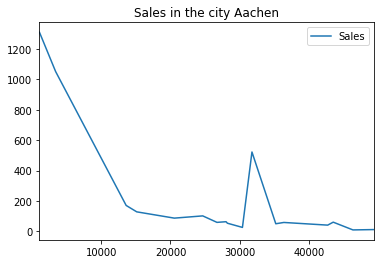

In [48]:
sales_by_city_df.get_group("Aachen").plot(title = "Sales in the city Aachen")